# Porównanie analitycznej i numerycznej implementacji regresji na syntetycznym zbiorze

In [2]:
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import datasets

from scipy import optimize

import numpy as np

import matplotlib.pyplot as plt

noise = 16
samples = 2425
seed = 244825
features = 1
train_split = 0.8
test_split = 0.2
repeats = 100

close_to_zero = 10 ** (-100)

In [3]:
X, y = datasets.make_regression(n_features=features, noise=noise, n_samples=samples, random_state=seed)

poly = PolynomialFeatures(1)
X_transformed = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, train_size=train_split, test_size=test_split, random_state=seed)

Xt_train = np.transpose(X_train)

In [4]:
def calculate_theta_old(mX, my):
    mXt = mX.transpose()
    return np.matmul(np.linalg.inv(np.matmul(mXt, mX)), (np.matmul(mXt, my)))


start_time_analytical = time.perf_counter()
for i in range(repeats):
    w = calculate_theta_old(X_train, y_train)
analytical_performance = time.perf_counter() - start_time_analytical
analytical_performance

0.005605599999967126

In [5]:
def f(x0, X_param, Y_param):
    x_times_w_minus_y = (Y_param - np.matmul(X_param, x0))
    x_times_w_minus_y_transposed = x_times_w_minus_y.transpose()
    final = (np.matmul(x_times_w_minus_y, x_times_w_minus_y_transposed))
    return final / len(X_param)


start_time_numerical = time.perf_counter()

for i in range(repeats):
    n = optimize.minimize(f, [1, 1], args=(X_train, y_train), method='Powell')
numerical_performance = time.perf_counter() - start_time_numerical
numerical_performance

0.16619490000005044

In [6]:
print("Analityczna:", w)
print("Numeryczna:", n.x)

Analityczna: [-0.29219049 50.88647004]
Numeryczna: [-0.2921903  50.88647012]


In [7]:
def calculate_y_value(theta, x) -> float:
    return theta[1] * x + theta[0]

x_lower_bound = np.floor(np.min(X_train[:,1]))
x_upper_bound = np.ceil(np.max(X_train[:,1]))

x_points = (x_lower_bound, x_upper_bound)

analytical_points = (calculate_y_value(w, x_lower_bound), calculate_y_value(w, x_upper_bound))

numerical_points = (calculate_y_value(n.x, x_lower_bound), calculate_y_value(n.x, x_upper_bound))

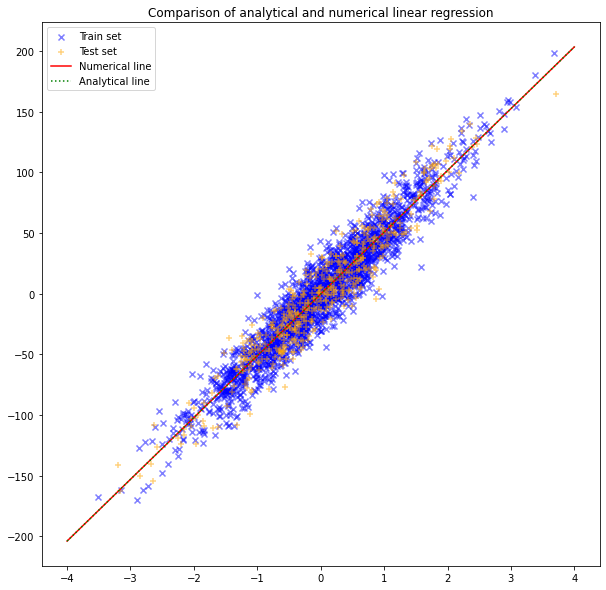

In [8]:
plt.figure(figsize=(10, 10))

plt.title("Comparison of analytical and numerical linear regression")
plt.scatter(X_train[:,1], y_train, alpha=0.5, color="blue", marker="x", label="Train set")
plt.scatter(X_test[:,1], y_test, alpha=0.5, color="orange", marker="+", label="Test set")

plt.plot(x_points, numerical_points, linestyle="-", color='red',
         label="Numerical line")
plt.plot(x_points, analytical_points, linestyle=":", color='g',
         label="Analytical line")

plt.legend()
plt.show()

In [9]:
def calculate_mse(test_y, predictions):
    return np.square(np.subtract(test_y, predictions)).mean()


analytical_prediction = []
numerical_prediction = []

for value in X_test[:,1]:
    analytical_prediction.append(calculate_y_value(w, value))
    numerical_prediction.append(calculate_y_value(n.x, value))

analytical_mean_square_error = np.square(np.subtract(y_test, analytical_prediction)).mean()

numerical_mean_square_error = np.square(np.subtract(y_test, numerical_prediction)).mean()

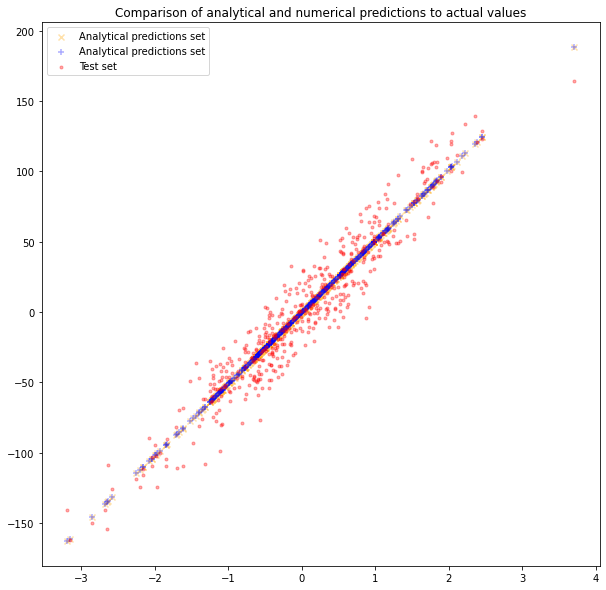

In [10]:
plt.figure(figsize=(10, 10))

plt.title("Comparison of analytical and numerical predictions to actual values")
plt.scatter(X_test[:,1], analytical_prediction, alpha=0.33, color="orange", marker="x", label="Analytical predictions set")
plt.scatter(X_test[:,1], numerical_prediction, alpha=0.33, color="blue", marker="+", label="Analytical predictions set")
plt.scatter(X_test[:,1], y_test, alpha=0.33, color="red", marker=".", label="Test set")

plt.legend()
plt.show()

### Podsumowanie

# Wyniki metod analitycznej i numerycznej
Analityczna: [-0.29219049 50.88647004]
Numeryczna: [-0.2921903  50.88647012]
Linear regression z scikit-learn: [-0.2921904856701316, 50.8864700369067]

Czas wykonania metod analitycznej i numerycznej
Analityczna: 0.005605599999967126 s
Numeryczna: 0.16619490000005044 s

Blad sredniokwadratowy metod analitycznej i numerycznej
Analityczna: 246.78147636315313
Numeryczna: 246.78147623815076


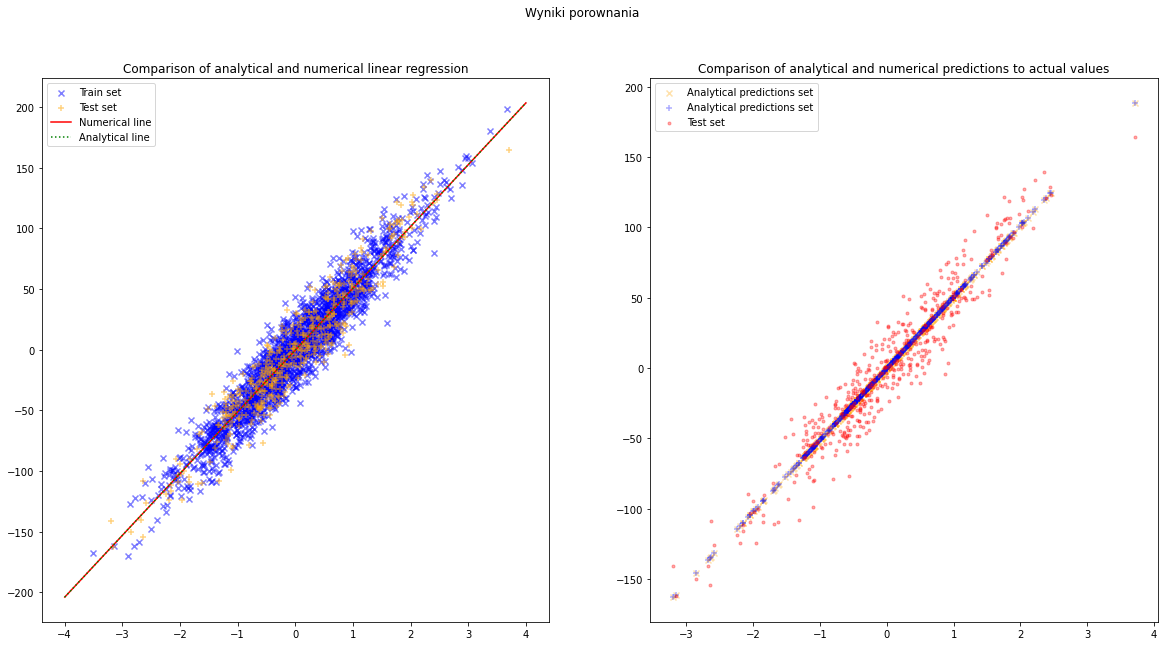

In [11]:
print("# Wyniki metod analitycznej i numerycznej")
print("Analityczna:", w)
print("Numeryczna:", n.x)

reg = LinearRegression()
reg.fit(X_train, y_train)
print("Linear regression z scikit-learn:",[reg.intercept_, reg.coef_[1]])

print("\nCzas wykonania metod analitycznej i numerycznej")
print("Analityczna:", analytical_performance, "s")
print("Numeryczna:", numerical_performance, "s")

print("\nBlad sredniokwadratowy metod analitycznej i numerycznej")
print("Analityczna:", analytical_mean_square_error)
print("Numeryczna:", numerical_mean_square_error)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Wyniki porownania')

ax1.set_title("Comparison of analytical and numerical linear regression")
ax1.scatter(X_train[:,1], y_train, alpha=0.5, color="blue", marker="x", label="Train set")
ax1.scatter(X_test[:,1], y_test, alpha=0.5, color="orange", marker="+", label="Test set")

ax1.plot(x_points, numerical_points, linestyle="-", color='red',
         label="Numerical line")
ax1.plot(x_points, analytical_points, linestyle=":", color='g',
         label="Analytical line")

ax1.legend()

ax2.set_title("Comparison of analytical and numerical predictions to actual values")
ax2.scatter(X_test[:,1], analytical_prediction, alpha=0.33, color="orange", marker="x", label="Analytical predictions set")
ax2.scatter(X_test[:,1], numerical_prediction, alpha=0.33, color="blue", marker="+", label="Analytical predictions set")
ax2.scatter(X_test[:,1], y_test, alpha=0.33, color="red", marker=".", label="Test set")

ax2.legend()

plt.show()

# Porównanie sklearn i analitycznej implementacji regresji na zbiorze FlapPy Bird

In [12]:
def normalize(matrix):
    sub = matrix - np.min(matrix)
    max_min_sub = np.max(matrix) - np.min(matrix)
    return sub/max_min_sub


flappy_data_1 = np.genfromtxt("1.csv", delimiter=",")

f1_x = normalize(np.reshape(flappy_data_1[:,0], (len(flappy_data_1), 1)))
f1_y = normalize(np.reshape(flappy_data_1[:,1], (len(flappy_data_1), 1)))

poly9_1 = PolynomialFeatures(9)
poly9_1= poly9_1.fit_transform(f1_x)
model9_1 = LinearRegression()
model9_1.fit(poly9_1, f1_y)

poly21_1 = PolynomialFeatures(21)
poly21_1 = poly21_1.fit_transform(f1_x)
model21_1 = LinearRegression()
model21_1.fit(poly21_1, f1_y)

coef9_1 = (model9_1.intercept_, model9_1.coef_)
coef21_1 = (model21_1.intercept_, model21_1.coef_)

predict9_1 = model9_1.predict(poly9_1)
predict21_1 = model21_1.predict(poly21_1)

mse9_1 = calculate_mse(f1_y, predict9_1)
mse21_1 = calculate_mse(f1_y, predict21_1)

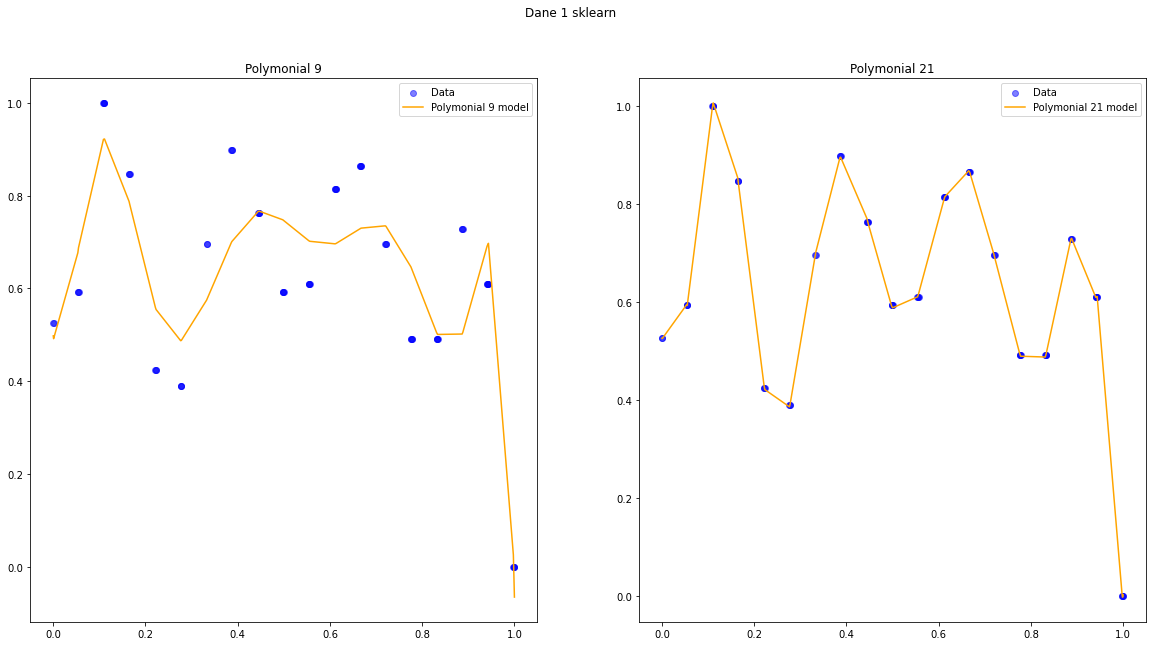

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle("Dane 1 sklearn")
ax1.set_title("Polymonial 9")
ax1.scatter(f1_x, f1_y, alpha=0.5, color="blue", label="Data")

ax1.plot(f1_x, predict9_1, linestyle="-", color='orange',
         label="Polymonial 9 model")

ax1.legend()

ax2.set_title("Polymonial 21")
ax2.scatter(f1_x, f1_y, alpha=0.5, color="blue", label="Data")

ax2.plot(f1_x, predict21_1, linestyle="-", color='orange',
         label="Polymonial 21 model")

ax2.legend()

plt.show()

In [14]:
flappy_data_2 = np.genfromtxt("2.csv", delimiter=",")

f2_x = normalize(np.reshape(flappy_data_2[:,0], (len(flappy_data_2), 1)))
f2_y = normalize(np.reshape(flappy_data_2[:,1], (len(flappy_data_2), 1)))

poly9_2 = PolynomialFeatures(9)
poly9_2= poly9_2.fit_transform(f2_x)
model9_2 = LinearRegression()
model9_2.fit(poly9_2, f2_y)

poly21_2 = PolynomialFeatures(21)
poly21_2 = poly21_2.fit_transform(f2_x)
model21_2 = LinearRegression()
model21_2.fit(poly21_2, f2_y)

coef9_2 = (model9_2.intercept_, model9_2.coef_)
coef21_2 = (model21_2.intercept_, model21_2.coef_)

predict9_2 = model9_2.predict(poly9_2)
predict21_2 = model21_2.predict(poly21_2)

mse9_2 = calculate_mse(f2_y, predict9_2)
mse21_2 = calculate_mse(f2_y, predict21_2)

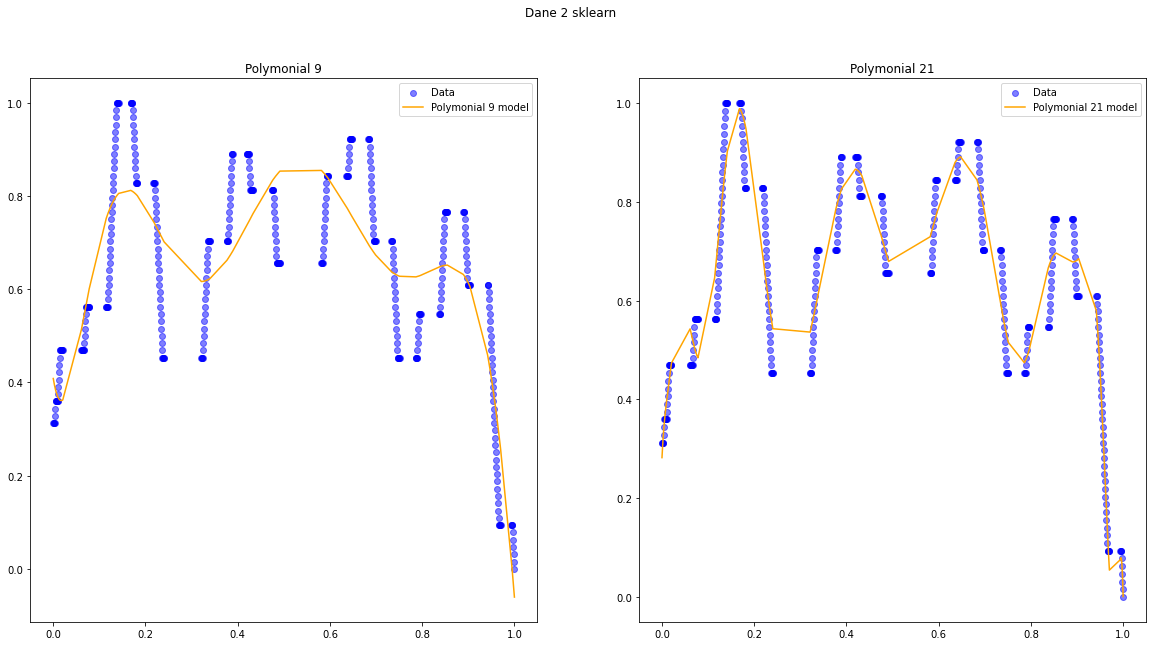

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle("Dane 2 sklearn")
ax1.set_title("Polymonial 9")
ax1.scatter(f2_x, f2_y, alpha=0.5, color="blue", label="Data")

ax1.plot(f2_x, predict9_2, linestyle="-", color='orange',
         label="Polymonial 9 model")

ax1.legend()

ax2.set_title("Polymonial 21")
ax2.scatter(f2_x, f2_y, alpha=0.5, color="blue", label="Data")

ax2.plot(f2_x, predict21_2, linestyle="-", color='orange',
         label="Polymonial 21 model")

ax2.legend()

plt.show()

In [16]:
flappy_data_3 = np.genfromtxt("3.csv", delimiter=",")

f3_x = normalize(np.reshape(flappy_data_3[:,0], (len(flappy_data_3), 1)))
f3_y = normalize(np.reshape(flappy_data_3[:,1], (len(flappy_data_3), 1)))

poly9_3 = PolynomialFeatures(9)
poly9_3 = poly9_3.fit_transform(f3_x)
model9_3 = LinearRegression()
model9_3.fit(poly9_3, f3_y)

poly21_3 = PolynomialFeatures(21)
poly21_3 = poly21_3.fit_transform(f3_x)
model21_3 = LinearRegression()
model21_3.fit(poly21_3, f3_y)

coef9_3 = (model9_3.intercept_, model9_3.coef_)
coef21_3 = (model21_3.intercept_, model21_3.coef_)

predict9_3 = model9_3.predict(poly9_3)
predict21_3 = model21_3.predict(poly21_3)

mse9_3 = calculate_mse(f3_y, predict9_3)
mse21_3 = calculate_mse(f3_y, predict21_3)

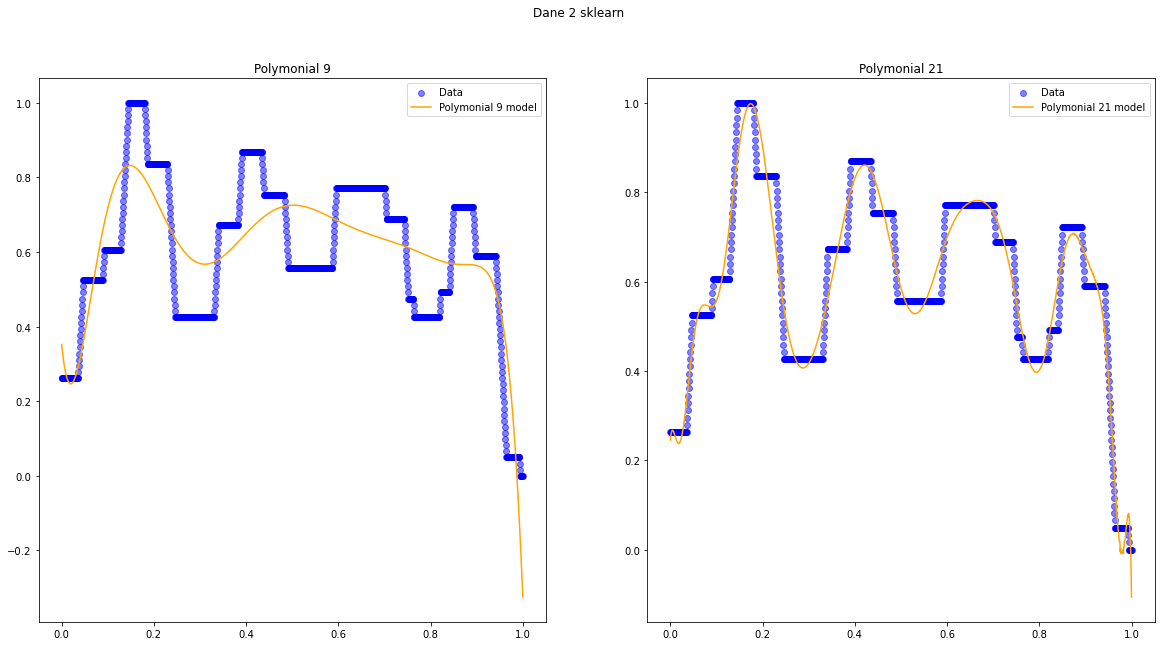

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle("Dane 2 sklearn")
ax1.set_title("Polymonial 9")
ax1.scatter(f3_x, f3_y, alpha=0.5, color="blue", label="Data")

ax1.plot(f3_x, predict9_3, linestyle="-", color='orange',
         label="Polymonial 9 model")

ax1.legend()

ax2.set_title("Polymonial 21")
ax2.scatter(f3_x, f3_y, alpha=0.5, color="blue", label="Data")

ax2.plot(f3_x, predict21_3, linestyle="-", color='orange',
         label="Polymonial 21 model")

ax2.legend()

plt.show()

### Uzycie zaimplementowanej metody analitycznej

In [18]:
def calculate_values(mX, theta):
    return np.sum(np.matmul(mX, theta), axis=1)


def calculate_theta(mX, my):
    mXt = mX.transpose()
    return np.matmul(np.linalg.pinv(np.matmul(mXt, mX)), (np.matmul(mXt, my)))


poly9_1a = PolynomialFeatures(9)
poly9_1a = poly9_1a.fit_transform(f1_x)
w9_1a = calculate_theta(poly9_1a, f1_y)

poly21_1a = PolynomialFeatures(21)
poly21_1a = poly21_1a.fit_transform(f1_x)
w21_1a = calculate_theta(poly21_1a, f1_y)

coef9_1a = np.asarray(w9_1a)
coef21_1a = np.asarray(w21_1a)

analytical_prediction_9_1a = calculate_values(poly9_1a, w9_1a)
analytical_prediction_21_1a = calculate_values(poly21_1a, w21_1a)

mse9_1a = calculate_mse(f1_y, analytical_prediction_9_1a)
mse21_1a = calculate_mse(f1_y, analytical_prediction_21_1a)

In [19]:
poly9_2a = PolynomialFeatures(9)
poly9_2a = poly9_2a.fit_transform(f2_x)
w9_2a = calculate_theta(poly9_2a, f2_y)

poly21_2a = PolynomialFeatures(21)
poly21_2a = poly21_2a.fit_transform(f2_x)
w21_2a = calculate_theta(poly21_2a, f2_y)

coef9_2a = np.asarray(w9_2a)
coef21_2a = np.asarray(w21_2a)

analytical_prediction_9_2a = calculate_values(poly9_2a, w9_2a)
analytical_prediction_21_2a = calculate_values(poly21_2a, w21_2a)

mse9_2a = calculate_mse(f2_y, analytical_prediction_9_2a)
mse21_2a = calculate_mse(f2_y, analytical_prediction_21_1a)

In [20]:
poly9_3a = PolynomialFeatures(9)
poly9_3a = poly9_3a.fit_transform(f3_x)
w9_3a = calculate_theta(poly9_3a, f3_y)

poly21_3a = PolynomialFeatures(21)
poly21_3a = poly21_3a.fit_transform(f3_x)
w21_3a = calculate_theta(poly21_3a, f3_y)

coef9_3a = np.asarray(w9_3a)
coef21_3a = np.asarray(w21_3a)

analytical_prediction_9_3a = calculate_values(poly9_3a, w9_3a)
analytical_prediction_21_3a = calculate_values(poly21_3a, w21_3a)

mse9_3a = calculate_mse(f3_y, analytical_prediction_9_3a)
mse21_3a = calculate_mse(f3_y, analytical_prediction_21_3a)

[ 0.35184088  0.34370234  0.33594967 ... -0.28399265 -0.30454941
 -0.32551144]


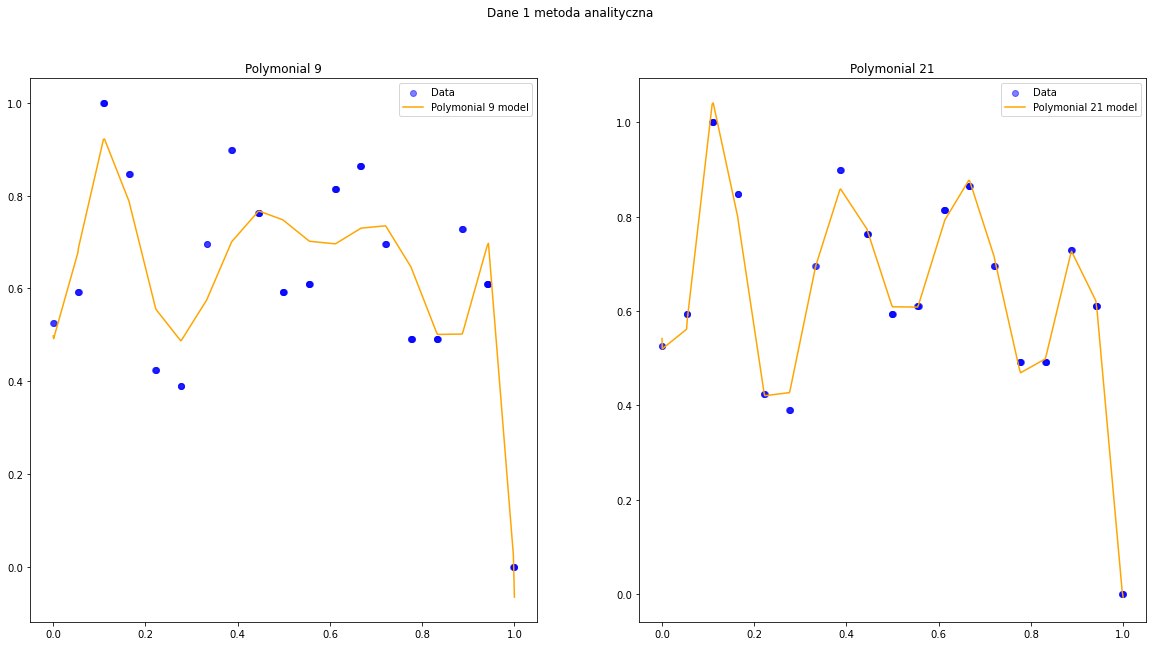

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle("Dane 1 metoda analityczna")
ax1.set_title("Polymonial 9")
ax1.scatter(f1_x, f1_y, alpha=0.5, color="blue", label="Data")

ax1.plot(f1_x, analytical_prediction_9_1a, linestyle="-", color='orange',
         label="Polymonial 9 model")

ax1.legend()

ax2.set_title("Polymonial 21")
ax2.scatter(f1_x, f1_y, alpha=0.5, color="blue", label="Data")

ax2.plot(f1_x, analytical_prediction_21_1a, linestyle="-", color='orange',
         label="Polymonial 21 model")

ax2.legend()

plt.show()

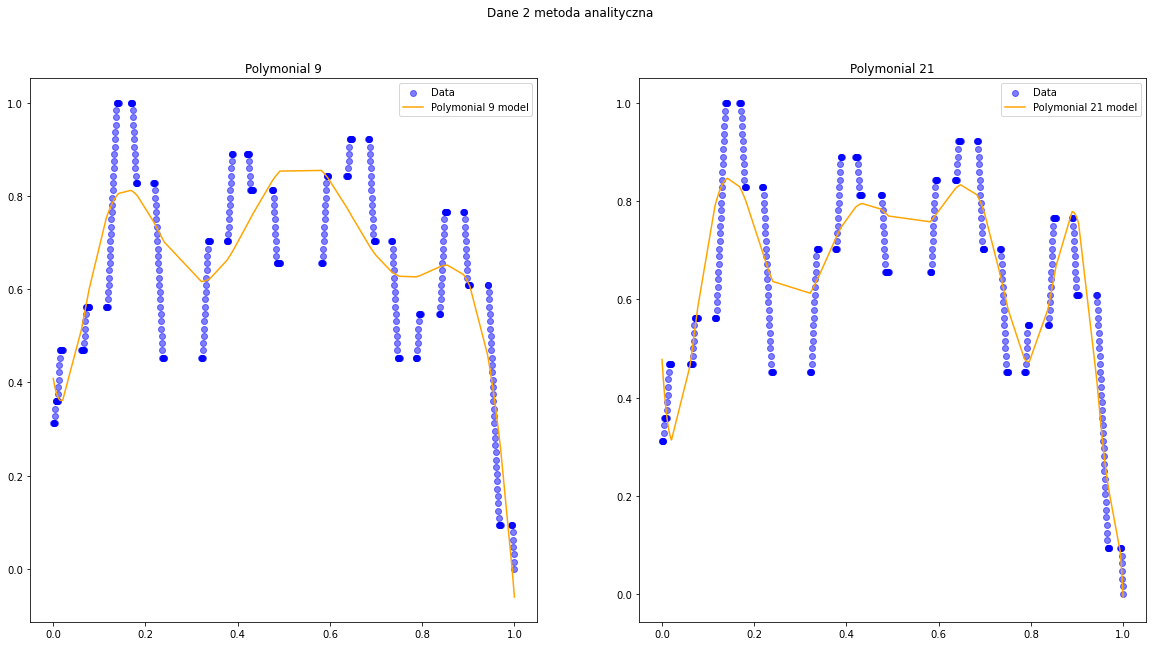

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle("Dane 2 metoda analityczna")
ax1.set_title("Polymonial 9")
ax1.scatter(f2_x, f2_y, alpha=0.5, color="blue", label="Data")

ax1.plot(f2_x, analytical_prediction_9_2a, linestyle="-", color='orange',
         label="Polymonial 9 model")

ax1.legend()

ax2.set_title("Polymonial 21")
ax2.scatter(f2_x, f2_y, alpha=0.5, color="blue", label="Data")

ax2.plot(f2_x, analytical_prediction_21_2a, linestyle="-", color='orange',
         label="Polymonial 21 model")

ax2.legend()

plt.show()

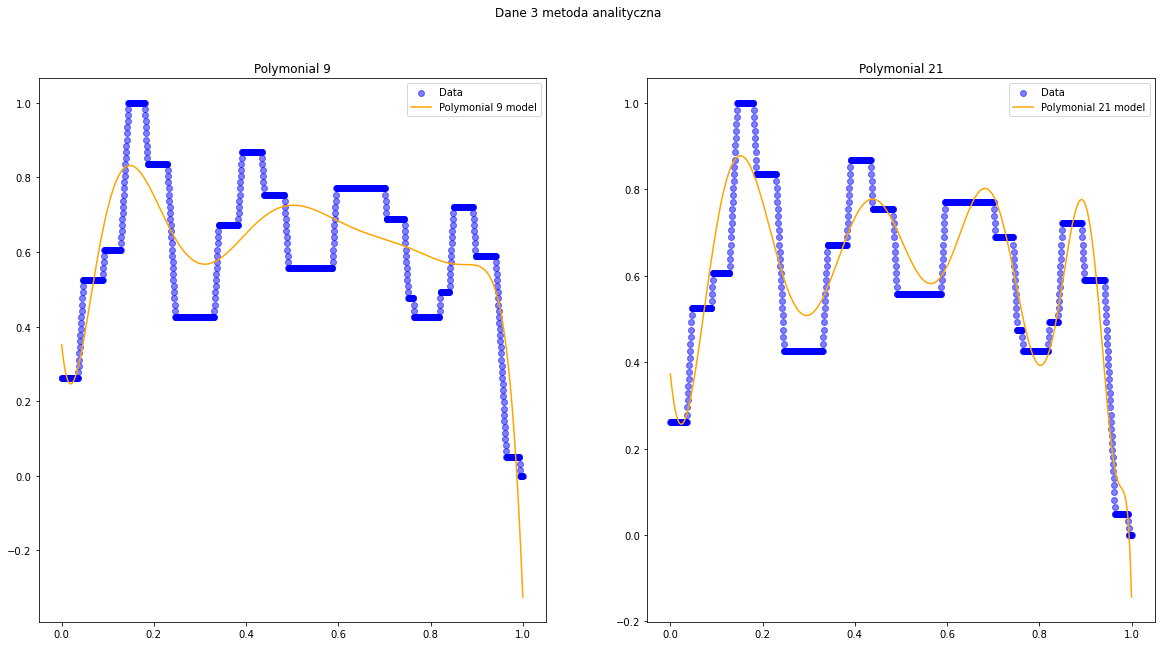

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle("Dane 3 metoda analityczna")
ax1.set_title("Polymonial 9")
ax1.scatter(f3_x, f3_y, alpha=0.5, color="blue", label="Data")

ax1.plot(f3_x, analytical_prediction_9_3a, linestyle="-", color='orange',
         label="Polymonial 9 model")

ax1.legend()

ax2.set_title("Polymonial 21")
ax2.scatter(f3_x, f3_y, alpha=0.5, color="blue", label="Data")

ax2.plot(f3_x, analytical_prediction_21_3a, linestyle="-", color='orange',
         label="Polymonial 21 model")

ax2.legend()

plt.show()

### Podsumowanie

In [24]:
print("Zbior 1")
print("MSE dla sklearn z wielomianem 9:", mse9_1)
print("MSE dla sklearn z wielomianem 21:", mse21_1)
print("MSE dla metody analitycznej z wielomianem 9:", mse9_1a)
print("MSE dla metody analitycznej z wielomianem 21:", mse21_1a)
print("Wynik regresji dla sklearn z wielomianem 9:", coef9_1)
print("Wynik regresji dla sklearn z wielomianem 21:", coef21_1)
print("Wynik regresji dla metody analitycznej z wielomianem 9:", coef9_1a)
print("Wynik regresji dla metody analitycznej z wielomianem 21:", coef21_1a)

print("\nZbior 2")
print("MSE dla sklearn z wielomianem 9:", mse9_2)
print("MSE dla sklearn z wielomianem 21:", mse21_2)
print("MSE dla metody analitycznej z wielomianem 9:", mse9_2a)
print("MSE dla metody analitycznej z wielomianem 21:", mse21_2a)
print("Wynik regresji dla sklearn z wielomianem 9:", coef9_2)
print("Wynik regresji dla sklearn z wielomianem 21:", coef21_2)
print("Wynik regresji dla metody analitycznej z wielomianem 9:", coef9_2a)
print("Wynik regresji dla metody analitycznej z wielomianem 21:", coef21_2a)

print("\nZbior 3")
print("MSE dla sklearn z wielomianem 9:", mse9_3)
print("MSE dla sklearn z wielomianem 21:", mse21_3)
print("MSE dla metody analitycznej z wielomianem 9:", mse9_3a)
print("MSE dla metody analitycznej z wielomianem 21:", mse21_3a)
print("Wynik regresji dla sklearn z wielomianem 9:", coef9_3)
print("Wynik regresji dla sklearn z wielomianem 21:", coef21_3)
print("Wynik regresji dla metody analitycznej z wielomianem 9:", coef9_3a)
print("Wynik regresji dla metody analitycznej z wielomianem 21:", coef21_3a)

Zbior 1
MSE dla sklearn z wielomianem 9: 0.012710886684863698
MSE dla sklearn z wielomianem 21: 9.881208497986065e-06
MSE dla metody analitycznej z wielomianem 9: 0.09204855872068057
MSE dla metody analitycznej z wielomianem 21: 0.10421451356090865
Wynik regresji dla sklearn z wielomianem 9: (array([0.49784683]), array([[ 0.00000000e+00, -8.25158240e+00,  4.12416343e+02,
        -4.83200481e+03,  2.58759919e+04, -7.58632332e+04,
         1.29803995e+05, -1.29432663e+05,  6.97341011e+04,
        -1.56909148e+04]]))
Wynik regresji dla sklearn z wielomianem 21: (array([0.52562633]), array([[ 0.00000000e+00, -1.92742900e+00,  2.09816488e+03,
        -1.30225847e+05,  3.54282194e+06, -5.51750857e+07,
         5.58310851e+08, -3.94146896e+09,  2.02436072e+10,
        -7.74795180e+10,  2.23385138e+11, -4.84117618e+11,
         7.72087943e+11, -8.48941771e+11,  4.99330181e+11,
         1.75875695e+11, -7.45208687e+11,  8.55677447e+11,
        -5.78696267e+11,  2.45212243e+11, -6.06670253e+10,


# Porównanie sklearn i wªasnej implementacji ridge regression na zbiorze FlapPy Bird

In [25]:
poly16_1 = PolynomialFeatures(16)
poly16_1 = poly16_1.fit_transform(f1_x)
model16_1 = Ridge(close_to_zero)
model16_1.fit(poly16_1, f1_y)

coef16_1 = (model16_1.intercept_, model16_1.coef_)

predict16_1 = model16_1.predict(poly16_1)

mse16_1 = calculate_mse(f1_y, predict16_1)

In [26]:
def calculate_ridge(mX, my, k):
    mXt = mX.transpose()
    mXt_times_mX = np.matmul(mXt, mX)
    ide = np.identity(len(mXt_times_mX))
    identity = np.dot(k, ide)
    mXt_mX_plus_identity = np.add(mXt_times_mX, identity)
    inverse_mXt_mX_plus_identity = np.linalg.pinv(mXt_mX_plus_identity)
    mXt_times_my = np.matmul(mXt, my)
    final = np.matmul(inverse_mXt_mX_plus_identity, mXt_times_my)

    return final


poly16_1a = PolynomialFeatures(16)
poly16_1a = poly16_1a.fit_transform(f1_x)

ridge_1a = calculate_ridge(poly16_1, f1_y, close_to_zero)

coef16_1a = ridge_1a

predict16_1a = calculate_values(poly16_1a, ridge_1a)

mse16_1a = calculate_mse(f1_y, predict16_1a)

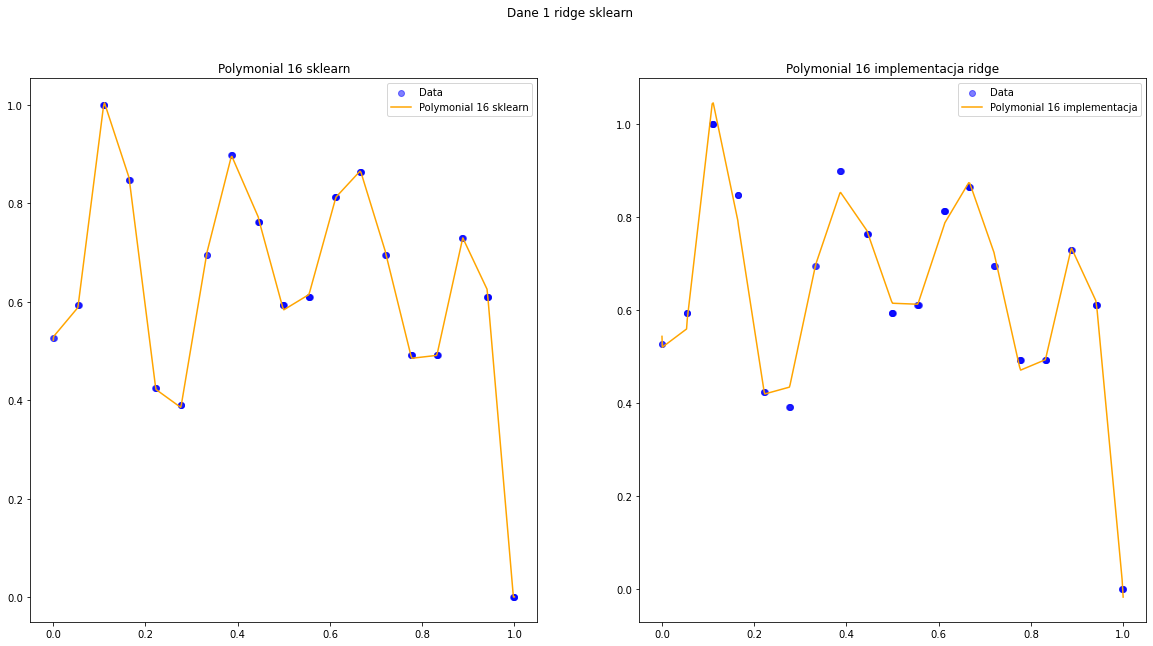

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle("Dane 1 ridge sklearn")
ax1.set_title("Polymonial 16 sklearn")
ax1.scatter(f1_x, f1_y, alpha=0.5, color="blue", label="Data")

ax1.plot(f1_x, predict16_1, linestyle="-", color='orange',
         label="Polymonial 16 sklearn")

ax1.legend()

ax2.set_title("Polymonial 16 implementacja ridge")
ax2.scatter(f1_x, f1_y, alpha=0.5, color="blue", label="Data")

ax2.plot(f1_x, predict16_1a, linestyle="-", color='orange',
         label="Polymonial 16 implementacja")

ax2.legend()


plt.show()

In [28]:
poly16_2 = PolynomialFeatures(16)
poly16_2 = poly16_2.fit_transform(f2_x)
model16_2 = Ridge(close_to_zero)
model16_2.fit(poly16_2, f2_y)

coef16_2 = (model16_2.intercept_, model16_2.coef_)

predict16_2 = model16_2.predict(poly16_2)

mse16_2 = calculate_mse(f2_y, predict16_2)

In [29]:
poly16_2a = PolynomialFeatures(16)
poly16_2a = poly16_2a.fit_transform(f2_x)

ridge_2a = calculate_ridge(poly16_2, f2_y, close_to_zero)

coef16_2a = ridge_2a

predict16_2a = calculate_values(poly16_2, ridge_2a)

mse16_2a = calculate_mse(f2_y, predict16_2a)

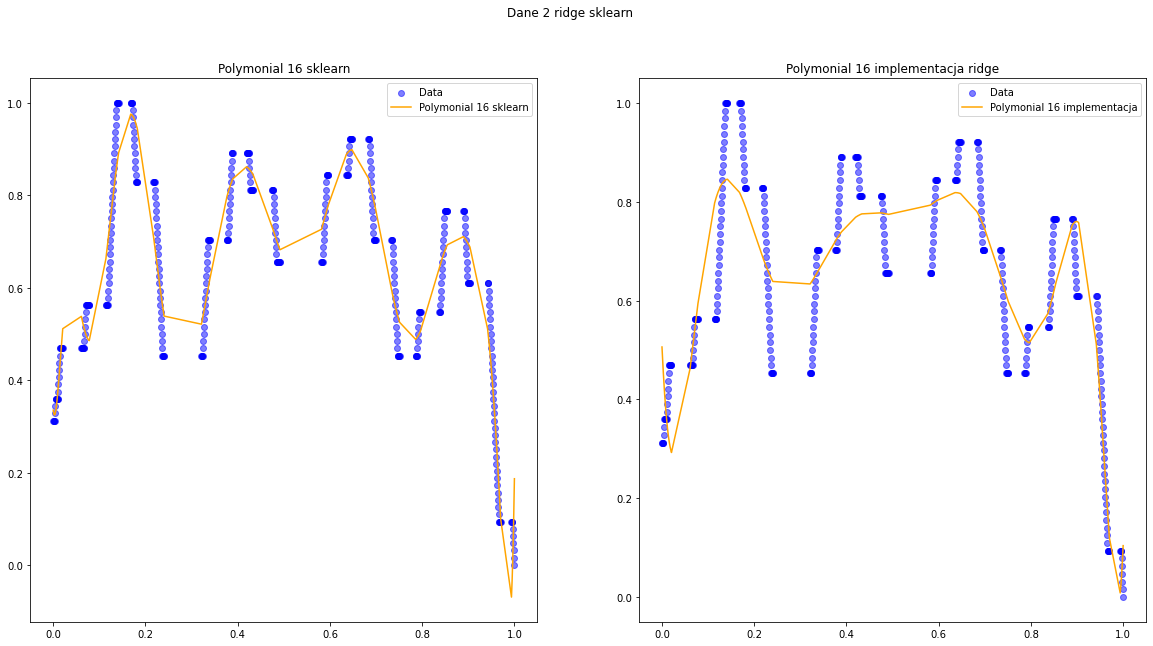

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle("Dane 2 ridge sklearn")
ax1.set_title("Polymonial 16 sklearn")
ax1.scatter(f2_x, f2_y, alpha=0.5, color="blue", label="Data")

ax1.plot(f2_x, predict16_2, linestyle="-", color='orange',
         label="Polymonial 16 sklearn")

ax1.legend()

ax2.set_title("Polymonial 16 implementacja ridge")
ax2.scatter(f2_x, f2_y, alpha=0.5, color="blue", label="Data")

ax2.plot(f2_x, predict16_2a, linestyle="-", color='orange',
         label="Polymonial 16 implementacja")

ax2.legend()


plt.show()

In [31]:
poly16_3 = PolynomialFeatures(16)
poly16_3 = poly16_3.fit_transform(f3_x)
model16_3 = Ridge(close_to_zero)
model16_3.fit(poly16_3, f3_y)

coef16_3 = (model16_3.intercept_, model16_3.coef_)

predict16_3 = model16_3.predict(poly16_3)

mse16_3 = calculate_mse(f3_y, predict16_3)

In [32]:
poly16_3a = PolynomialFeatures(16)
poly16_3a = poly16_3a.fit_transform(f3_x)

ridge_3a = calculate_ridge(poly16_3, f3_y, close_to_zero)

coef16_3a = ridge_3a

predict16_3a = calculate_values(poly16_3, ridge_3a)

mse16_3a = calculate_mse(f3_y, predict16_3a)

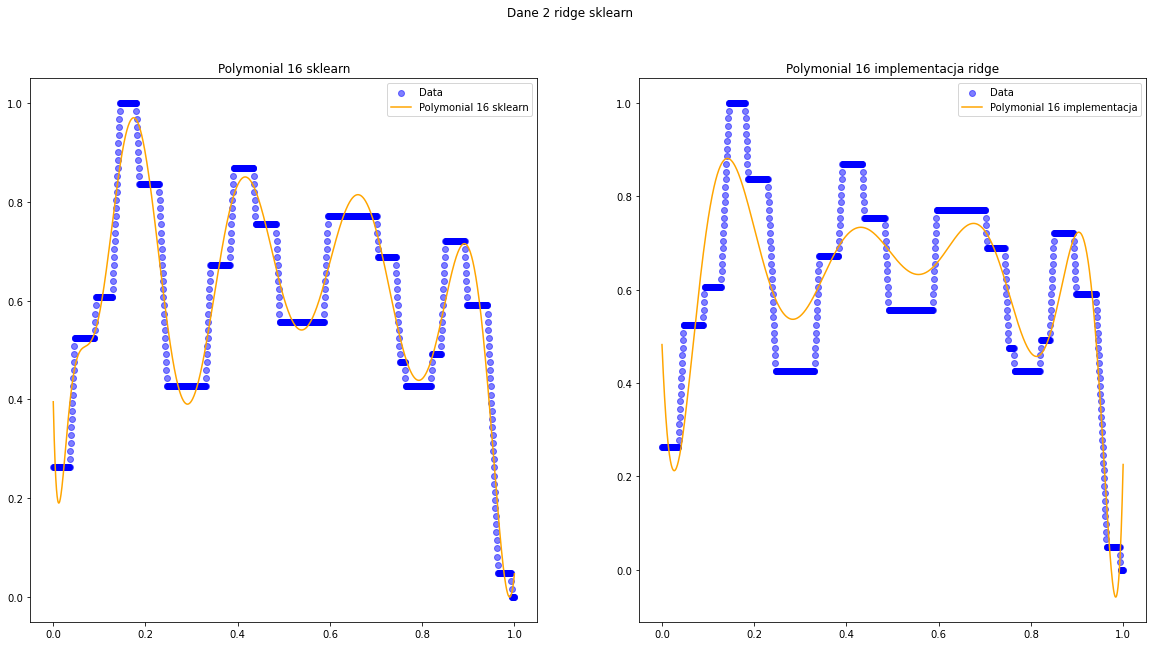

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

fig.suptitle("Dane 2 ridge sklearn")
ax1.set_title("Polymonial 16 sklearn")
ax1.scatter(f3_x, f3_y, alpha=0.5, color="blue", label="Data")

ax1.plot(f3_x, predict16_3, linestyle="-", color='orange',
         label="Polymonial 16 sklearn")

ax1.legend()

ax2.set_title("Polymonial 16 implementacja ridge")
ax2.scatter(f3_x, f3_y, alpha=0.5, color="blue", label="Data")

ax2.plot(f3_x, predict16_3a, linestyle="-", color='orange',
         label="Polymonial 16 implementacja")

ax2.legend()


plt.show()

### Podsumowanie

In [34]:
print("Zbior 1")
print("MSE dla sklearn z wielomianem 16:", mse16_1)
print("MSE dla metody analitycznej z wielomianem 16:", mse16_1a)
print("Wynik regresji dla sklearn z wielomianem 16:", coef16_1)
print("Wynik regresji dla metody analitycznej z wielomianem 16:", coef16_1a)

print("\nZbior 2")
print("MSE dla sklearn z wielomianem 16:", mse16_2)
print("MSE dla metody analitycznej z wielomianem 16:", mse16_2a)
print("Wynik regresji dla sklearn z wielomianem 16:", coef16_2)
print("Wynik regresji dla metody analitycznej z wielomianem 16:", coef16_2a)

print("\nZbior 3")
print("MSE dla sklearn z wielomianem 16:", mse16_3)
print("MSE dla metody analitycznej z wielomianem 16:", mse16_3a)
print("Wynik regresji dla sklearn z wielomianem 16:", coef16_3)
print("Wynik regresji dla metody analitycznej z wielomianem 16:", coef16_3a)

Zbior 1
MSE dla sklearn z wielomianem 16: 2.75116232417211e-05
MSE dla metody analitycznej z wielomianem 16: 0.10406383264335677
Wynik regresji dla sklearn z wielomianem 16: (array([0.52172503]), array([[ 0.00000000e+00,  1.06191503e+01, -8.95164358e+02,
         2.69394333e+04, -3.82756614e+05,  3.27672395e+06,
        -1.92903416e+07,  8.33059725e+07, -2.70193699e+08,
         6.59907347e+08, -1.20614831e+09,  1.63114872e+09,
        -1.60260247e+09,  1.10928406e+09, -5.12058764e+08,
         1.41380566e+08, -1.76531053e+07]]))
Wynik regresji dla metody analitycznej z wielomianem 16: [[ 5.42924559e-01]
 [-3.14010701e+01]
 [ 1.05845641e+03]
 [-1.12706842e+04]
 [ 5.49611275e+04]
 [-1.32847208e+05]
 [ 1.36278555e+05]
 [ 1.78129926e+04]
 [-1.07071081e+05]
 [-3.41282950e+04]
 [ 7.61631505e+04]
 [ 6.97896967e+04]
 [-2.76297177e+04]
 [-8.41741938e+04]
 [-1.60279502e+04]
 [ 9.54999019e+04]
 [-3.83839117e+04]]

Zbior 2
MSE dla sklearn z wielomianem 16: 0.004367960957119243
MSE dla metody anal